interactive(children=(FloatSlider(value=1.0, description='a', max=3.0), FloatSlider(value=1.0, description='b'…

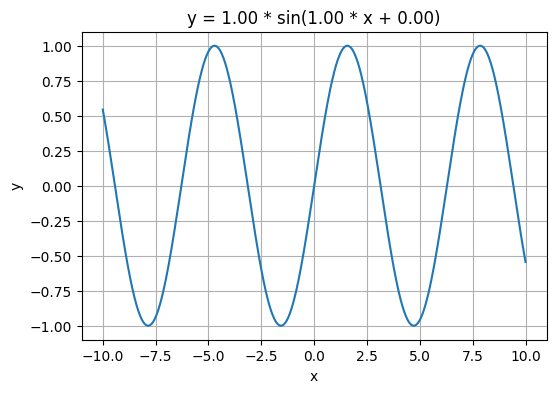

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plot_sine(a=1.0, b=1.0, c=0.0):
    x = np.linspace(-10, 10, 800)
    y = a * np.sin(b * x + c)
    plt.figure(figsize=(6, 4))
    plt.plot(x, y)                 # без задания цветов, как просили
    plt.grid(True)
    plt.title(f"y = {a:.2f} * sin({b:.2f} * x + {c:.2f})")
    plt.xlabel("x"); plt.ylabel("y")
    plt.show()

interact(
    plot_sine,
    a=FloatSlider(value=1.0, min=0.0, max=3.0, step=0.1, description='a'),
    b=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='b'),
    c=FloatSlider(value=0.0, min=-np.pi, max=np.pi, step=0.1, description='c'),
);


plot_sine()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, IntSlider, Checkbox, HBox, VBox, interactive_output, Layout

def log_q(y, q):
    # Change-of-base logarithm: log base q of y. Assumes q>1 and y>0.
    return np.log(y) / np.log(q)

def f_q(x, q):
    # f_q(x) = -x*log_q(x) - (1-x)*log_q(1-x) + x*log_q(q-1); domain x in (0,1), q>1
    return -x*log_q(x, q) - (1-x)*log_q(1-x, q) + x*log_q(q-1, q)

# Sliders
q_slider = FloatSlider(value=2.0, min=1.01, max=20.0, step=0.01, description='q', readout_format='.2f')
n_slider = IntSlider(value=800, min=200, max=4000, step=100, description='points')
show_max = Checkbox(value=True, description='Show maximum point')
show_grid = Checkbox(value=True, description='Grid')
pad_eps = FloatSlider(value=1e-4, min=1e-6, max=1e-2, step=1e-6, description='epsilon', readout_format='.0e',
                      layout=Layout(width='50%'))

def draw(q, n_points, show_maximum, grid_on, eps):
    # domain avoiding endpoints (0 and 1) to keep logs defined
    x = np.linspace(eps, 1.0-eps, int(n_points))
    y = f_q(x, q)
    # Plot
    plt.figure(figsize=(7, 4.5))
    plt.plot(x, y, label='f_q(x)')
    if grid_on:
        plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('f_q(x)')
    plt.title(f'f_q(x) for q={q:.3f}')
    # Show maximum if requested
    if show_maximum:
        idx = np.nanargmax(y)
        xm, ym = x[idx], y[idx]
        plt.scatter([xm], [ym])
        plt.annotate(f'max at x≈{xm:.4f}, f≈{ym:.4f}', xy=(xm, ym),
                     xytext=(0.55, 0.9), textcoords='axes fraction',
                     arrowprops=dict(arrowstyle='->'))
    plt.show()

out = interactive_output(draw, {
    'q': q_slider,
    'n_points': n_slider,
    'show_maximum': show_max,
    'grid_on': show_grid,
    'eps': pad_eps
})

ui = VBox([HBox([q_slider, n_slider]), HBox([show_max, show_grid, pad_eps]), out])
ui